In [41]:
import pdfplumber
import re
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'

In [55]:
x0 = 0    # Distance of left side of character from left side of page.
x1 = 0.4  # Distance of right side of character from left side of page.
y0 = 0  # Distance of bottom of character from bottom of page.
y1 = 1  # Distance of top of character from bottom of page.

# file = pdfplumber.open('Kenneth M Hoffman, Ray Kunze - Linear Algebra -Prentice Hall (1971).pdf')
file = pdfplumber.open('David J. Griffiths - Introduction to Electrodynamics (1999, Prentice-Hall) - libgen.lc.pdf') 

node_list = []

for x in range(578,579):
    all_content = []
    page = file.pages[x]
    
    width = page.width
    height = page.height

    # Crop pages
    left_bbox = (0*float(width), y0*float(height), x1*float(width), y1*float(height))
    page_crop = page.crop(bbox=left_bbox)
    left_text = page_crop.extract_text()

    right_bbox = (x1*float(width), y0*float(height), 1*float(width), y1*float(height))
    page_crop = page.crop(bbox=right_bbox)
    right_text = page_crop.extract_text()
    page_context = '\n'.join([left_text, right_text])
    all_content.append(page_context)

    print(all_content[0])

    text_=all_content#.extract_text()

    if 'Index' in text_[0]:
        new_text_ = text_[0].split(',')
        new_text_ = list(new_text_)

        for y in range(len(new_text_)):
            if new_text_[y].isdigit():
                pass
            else:
                result = ''.join([i for i in new_text_[y] if not i.isdigit()])
                node_list.append(result.replace('\n',''))

node_list = [name for name in node_list if name.strip()]
node_list = [name.lstrip() for name in node_list]
node_list = [name for name in node_list if name[0].isupper()]

# node_list

Index
Abraham-Lorentzformula,467,46
545-546
Absorption,392-398
Absorptioncoefficient, 402-403
Acausality, 421,425,467
Acceleration,
field, 438,460
ordinary, 521
proper, 521
Advancedpotentials,425
Advancedtime, 425
Alfven's theorem, 341
Ampere(unit), 208, 216
Ampere, AoMo, xiii
Amperedipole, 258, 284
Ampere's law, 225, 232, 321-326
applications of,225-232
in matter, 269-271
symmetryfor, 229
Amperianloop, 225, 239
Angle,
azimuthal, 38,43
ofincidence, 388
ofreflection, 388
ofrefraction, 388
polar, 38
Angularmomentum, 358-362
density, 358
Anomalousdispersion, 403-404
Antisymmetrictensor, 535, 537
Atomicpolarizability, 161,200
Auxiliaryfields:
D,175-182,271,273,328,5
H, 269-277, 328-332,545
Azimuthal angle,38,43
562
690 472, Azimuthal symmetry, 137
BAC-CABrule, 8
Backemf, 314, 317
Barelectret, 170, 178
Barmagnet,265, 274
Bamandladderparadox,491-492
Betatron, 336
Biot-Savartlaw,215-220, 339, 532
Bohratom,
lifetime,464-465
polarizability, 163
Bohrmagneton, 252
Boundcharge, 166-173, 186, 328
B

In [3]:
for i,node in enumerate(node_list):
    node = ' '.join( [w for w in node.split() if len(w)>1] )
    node = node.split(':')
    node = node[0].replace('Index ','')
    node_list[i] = node

In [4]:

all_sections=[]

for x in range(5,8):
    
    text_ = file.pages[x].extract_text()
    text_list = text_.split('\n')
    text_list_new = []
    for line_ in range(len(text_list)):
        
        text=text_list[line_]
        
        if (text[0].isdigit()) and (text.rstrip()[-1].isdigit()):
            text_list_new.append(text)
        elif (text[0].isdigit()) and ((line_+1)<=(len(text_list)-1)):
            text_list_new.append(text+text_list[line_+1])
#         if '8.4' in text:
#             print(text,'\n conditions-\n',text[0].isdigit() and text.rstrip()[-1].isdigit(),'\n',text+text_list[line_+1])
#             print(text_list[line_+1])
            
#     text_list_new = [text.rstrip('1234567890') for text in text_list_new]
    text_list_new=[x for x in text_list_new if len(x)>5]
    all_sections=all_sections+(text_list_new)
all_sections=[x[0:len(x)-4].lower().rstrip() for x in all_sections]
# all_sections=[x.split('.')[-1].lstrip() for x in all_sections]
all_sections= [re.sub('\s+',' ',x) for x in all_sections]
all_sections=[x.split('.')[-1].lstrip() for x in all_sections]
all_sections= [re.sub(r'[0-9]+', '', x) for x in all_sections]
all_sections=[x.lstrip() for x in all_sections]



In [5]:
all_sections=[x.split('.')[-1].lstrip() for x in all_sections]

it_section=0
dict_section_page_line={}

for x in range(8,394):
    text_=file.pages[x].extract_text()
    text_=text_.lower()
    text_list = text_.split('\n')
#     x=text_list[1]
    xx=[x.split('.') for x in text_list]
    text_new=[y[-1].rstrip().lstrip() for y in xx]
    text_new=[re.sub('\s+',' ',x) for x in text_new]
    line_num=np.where(all_sections[it_section]== np.array(text_new))[0]
    
    
    if line_num.shape[0]>0:
#         print(it_section)
        dict_section_page_line[str(it_section)+'.'+all_sections[it_section]]= [x,line_num]
        it_section=it_section+1
    else:
        for it__ in range(len(text_new)-2):
            joined_=text_new[it__]+' '+text_new[it__+1]
            if x==13:
                print(joined_)
            if re.sub('\s+',' ',joined_)==all_sections[it_section]:
                line_num=it__
                dict_section_page_line[str(it_section)+'.'+all_sections[it_section]]= [x,line_num]
                it_section=it_section+1
                break
        for it__ in range(len(text_new)-1):
            joined_=text_new[it__]
#             if x==13:
#                 print(joined_)
            if re.sub('\s+',' ',joined_).replace(' ','')==all_sections[it_section].replace(' ',''):
                line_num=it__
                dict_section_page_line[str(it_section)+'.'+all_sections[it_section]]= [x,line_num]
                it_section=it_section+1
                break

    if it_section==len(all_sections):
        break


xlll theunificationofphysicaltheories
theunificationofphysicaltheories theonedealt
theonedealt withglass rods and cat's fur, pithballs,batteries, currents, electrolysis, and lightning; the
withglass rods and cat's fur, pithballs,batteries, currents, electrolysis, and lightning; the but in 1820
but in 1820 soon
soon afterward, ampere correctly postulated that all magnetic phenomena are due to electric
afterward, ampere correctly postulated that all magnetic phenomena are due to electric then, in 1831,faradaydiscoveredthatamovingmagnetgenerates an
then, in 1831,faradaydiscoveredthatamovingmagnetgenerates an bythetime maxwellandlorentzputthe finishing touches onthetheory,
bythetime maxwellandlorentzputthe finishing touches onthetheory, theycouldnolongerberegarded
theycouldnolongerberegarded 
 maxwell'stheoryprovided
maxwell'stheoryprovided spectacularjustificationforthishypothesis, andsoonoptics-the studyoflenses, mirrors,
spectacularjustificationforthishypothesis, andsoonoptics-the study

In [6]:
for key in dict_section_page_line.keys():
    if type(dict_section_page_line[key][1])==np.ndarray:

        dict_section_page_line[key][1]=dict_section_page_line[key][1][0]

In [7]:
dict_section_text={}
page_nums=[]
for key in dict_section_page_line.keys():
    page_nums.append(dict_section_page_line[key][0])
text_section=[]    
section_names=list(dict_section_page_line.keys())
it_section=0
for x in range(8,394):
    
    text_=file.pages[x].extract_text()
    text_=text_.lower()
    text_list = text_.split('\n')
    
    if (x in page_nums) and x>8:
        it_section=it_section+1
        key=section_names[it_section]
#         print('line_num-----',dict_section_page_line[key][1])
        text_section.append(text_list[1:dict_section_page_line[key][1]])
        dict_section_text[section_names[it_section-1]]=text_section
        text_section=text_list[dict_section_page_line[key][1]:-1]
    else:
        text_section.append(text_list[1:-1])

IndexError: list index out of range

In [ ]:
dict_section_textcombined=dict_section_text.copy()
for k in dict_section_text.keys():
#     print(dict_section_text[k],'\n\n')
    text_combined='  '
    y=' '
    
    for xx in dict_section_text[k]:
        for x in xx:
            if text_combined[-2]=='-':
                text_combined=text_combined[0:-2]+x
            else:
                text_combined=text_combined+x
    dict_section_textcombined[k]=text_combined

In [ ]:
# dict_section_keywords_line_no = {keyword: {section: [line_numbers_within_section]}}
def dict_text_to_dict_keyword(temp_dict_text):

    temp_dict_section_keywords_line_no={}

    glossary_words=node_list.copy()
    it_gloss=0
    for x in glossary_words:
        print(it_gloss,'==',x,end='\r')
        it_gloss=it_gloss+1
        x_key=x
        x=x.split(' ')

        temp_dict_section_keywords_line_no[x_key]={}

        for k in temp_dict_text.keys():
            temp_dict_section_keywords_line_no[x_key][k]=[]
            search_text=temp_dict_text[k]
            search_text=[x for x in search_text.split(' ') if x!='']
            for it in range(len(search_text)-1):
                if [s.lower() for s in x] == search_text[it:it+len(x)]:
                    (temp_dict_section_keywords_line_no[x_key][k]).append(it)

    return temp_dict_section_keywords_line_no

In [ ]:
def simpleaxis(ax,xlab_,ylab_):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlabel(xlab_,fontsize=12) 
    ax.set_ylabel(ylab_,fontsize=12)        


#### Split the section text dictionary into two parts -- only section and only exercise

In [ ]:
dict_only_section_textcombined, dict_only_exercise_textcombined = (dict_section_textcombined.copy() for x in range(2))

for key, value in dict_section_textcombined.items():
    full_text = dict_section_textcombined[key]
    
    if 'exercises 1.' in full_text:
        split_text = full_text.split('exercises 1.',1)
        dict_only_section_textcombined[key] = split_text[0]
        dict_only_exercise_textcombined[key] = split_text[1]

    else:
        dict_only_exercise_textcombined[key] = ''


In [ ]:
dict_section_keywords_line_no = dict_text_to_dict_keyword(dict_section_textcombined)
dict_only_section_keywords_line_no = dict_text_to_dict_keyword(dict_only_section_textcombined)
dict_only_exercise_keywords_line_no = dict_text_to_dict_keyword(dict_only_exercise_textcombined)

In [ ]:
plot_keywords = rnd.sample(list(dict_section_keywords_line_no.keys()),k=20)

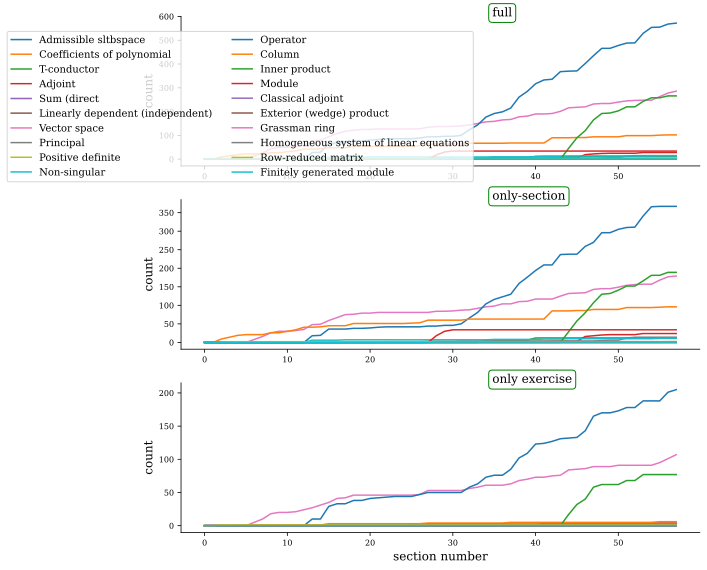

In [ ]:
fig,ax = plt.subplots(3,1,figsize=(8,8))
ax = ax.flatten()

xlab_='section number'
ylab_='count'


dict_list = [dict_section_keywords_line_no,dict_only_section_keywords_line_no,dict_only_exercise_keywords_line_no]
dict_names = ['full','only-section','only exercise']
for i, dictionary, name in zip(range(3),dict_list,dict_names):
    for k in range(20):
        temp_keyword_page = (list((dictionary[plot_keywords[k]]).values()))
        temp_keyword_page = np.cumsum([len(x) for x in temp_keyword_page])

        if i ==2:
            simpleaxis(ax[i],xlab_,ylab_)
            ax[i].plot(range(len(temp_keyword_page)),temp_keyword_page,label=plot_keywords[k])
        else:
            simpleaxis(ax[i],'',ylab_)
            ax[i].plot(range(len(temp_keyword_page)),temp_keyword_page)

    ax[i].text(0.6,1.0,name,fontsize=12, bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'), transform = ax[i].transAxes)


fig.legend(ncol=2,bbox_to_anchor=(0.6,0.95),fontsize=10)
plt.tight_layout()
plt.savefig('keyword_section_exercise_electrodynamics.pdf')
